In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
1
2
3
4
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#dataset loading

df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
#null value check
df.isnull().sum().max()

569

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
#Mapping the values
map_diagnosis = {'M':1,'B':0}

#Setting the map to the data_frame
df['diagnosis'] = df['diagnosis'].map(map_diagnosis)

#Let's see what we have done
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
# size of the dataframe
len(df)

569

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
#null value check
df.isnull().sum().max()

0

In [13]:
df.describe()
df.columns
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
#number of benign and malignant
print('benign', round(df['diagnosis'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('malignant', round(df['diagnosis'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

benign 62.74 % of the dataset
malignant 37.26 % of the dataset


In [15]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Class Distribution \n (0 = Benign and 1 = Malignant)')

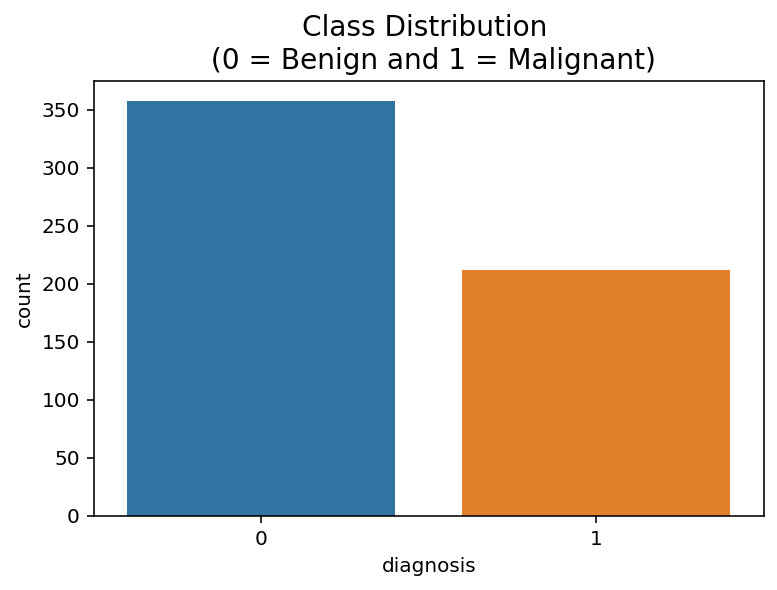

In [16]:
sn.countplot(x='diagnosis',data=df)
plt.title('Class Distribution \n (0 = Benign and 1 = Malignant)', fontsize=14)

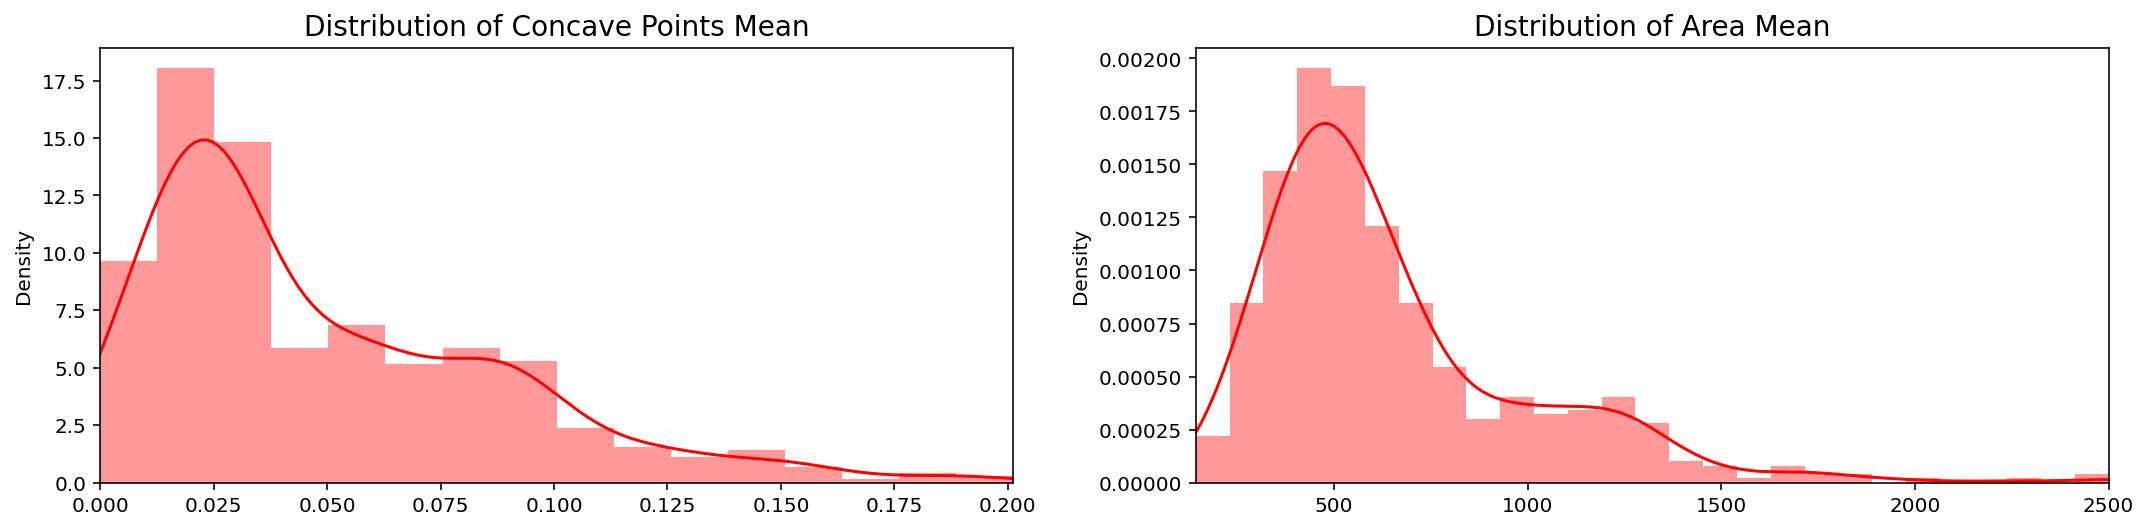

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

cpmean_val = df['concave points_mean'].values
aream_val = df['area_mean'].values

sn.distplot(cpmean_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Concave Points Mean', fontsize=14)
ax[0].set_xlim([min(cpmean_val), max(cpmean_val)])

sn.distplot(aream_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Area Mean', fontsize=14)
ax[1].set_xlim([min(aream_val), max(aream_val)])

plt.show()

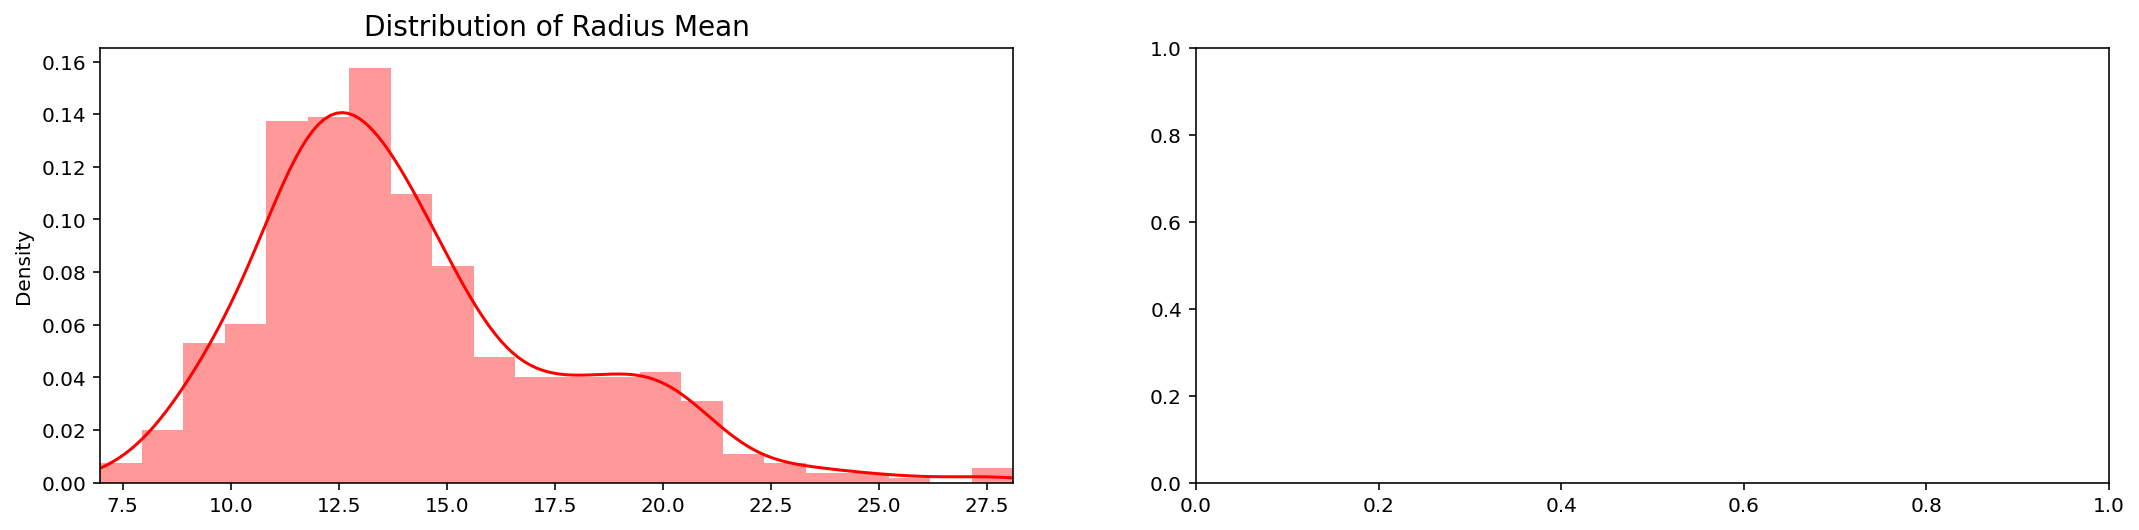

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
radiusm_val = df['radius_mean'].values

sn.distplot(radiusm_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Radius Mean', fontsize=14)
ax[0].set_xlim([min(radiusm_val), max(radiusm_val)])

plt.show()

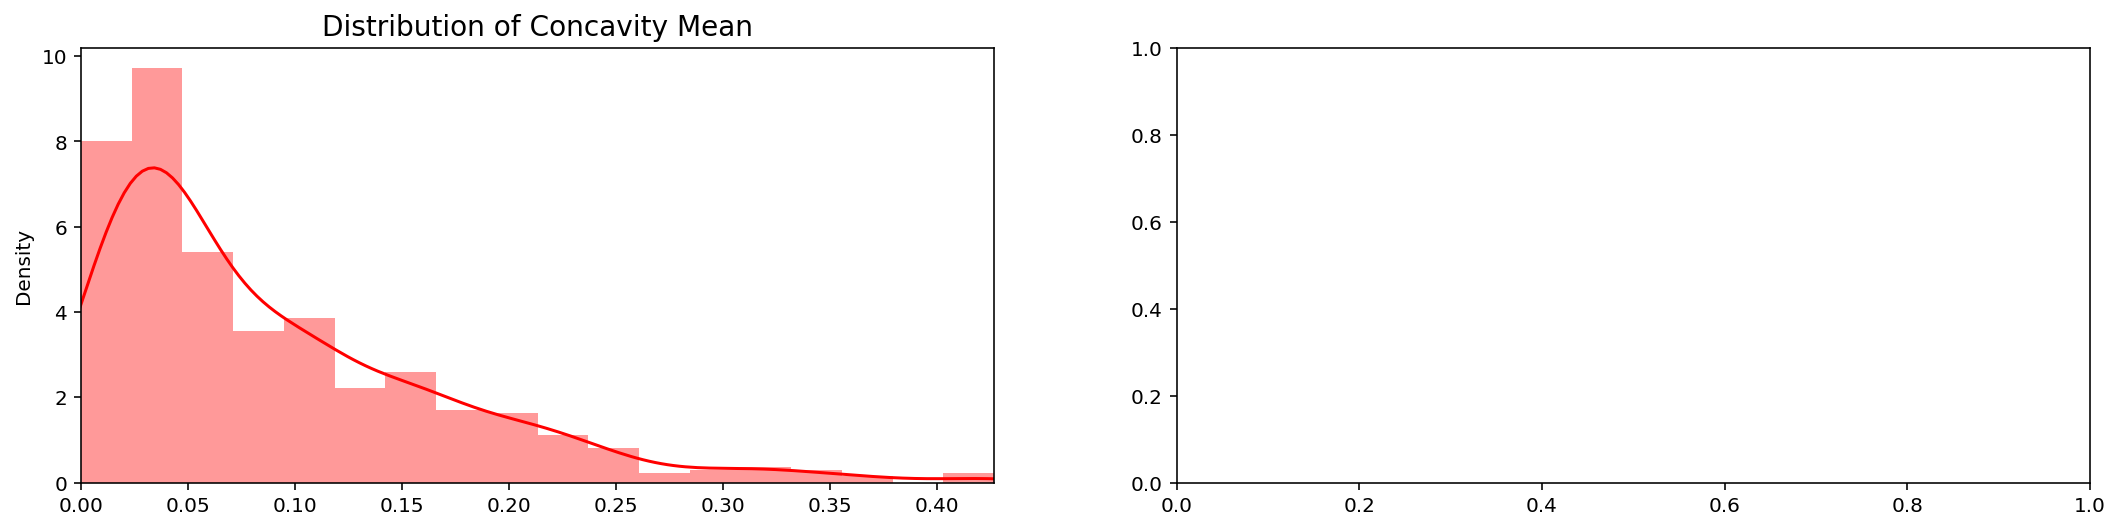

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
concavitym_val = df['concavity_mean'].values
sn.distplot(concavitym_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Concavity Mean', fontsize=14)
ax[0].set_xlim([min(concavitym_val), max(concavitym_val)])

plt.show()

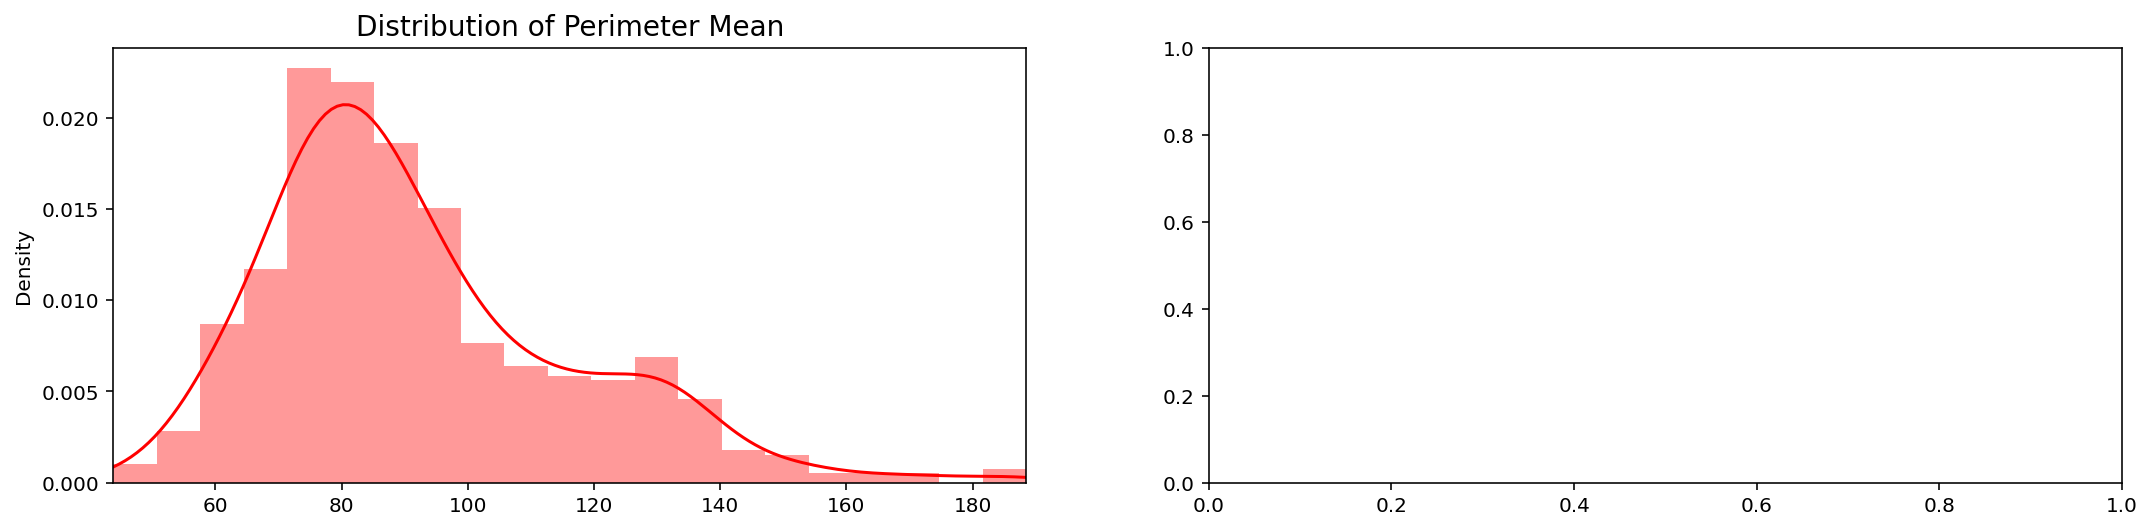

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
perimeterm_val = df['perimeter_mean'].values
sn.distplot(perimeterm_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Perimeter Mean', fontsize=14)
ax[0].set_xlim([min(perimeterm_val), max(perimeterm_val)])

plt.show()

In [21]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_cpm'] = rob_scaler.fit_transform(df['concave points_mean'].values.reshape(-1,1))
df['scaled_am'] = rob_scaler.fit_transform(df['area_mean'].values.reshape(-1,1))
df['scaled_rm'] = rob_scaler.fit_transform(df['radius_mean'].values.reshape(-1,1))
df['scaled_pm'] = rob_scaler.fit_transform(df['perimeter_mean'].values.reshape(-1,1))
df['scaled_cm'] = rob_scaler.fit_transform(df['concavity_mean'].values.reshape(-1,1))

df.drop(['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean'], axis=1, inplace=True)

In [22]:
scaled_rm = df['scaled_rm']
scaled_pm = df['scaled_pm']
scaled_am = df['scaled_am']
scaled_cm = df['scaled_cm']
scaled_cpm = df['scaled_cpm']

df.drop(['scaled_rm','scaled_pm','scaled_am','scaled_cm','scaled_cpm'], axis=1, inplace=True)
df.insert(1, 'scaled_rm', scaled_rm)
df.insert(3, 'scaled_pm', scaled_pm)
df.insert(4, 'scaled_am', scaled_am)
df.insert(7, 'scaled_cm', scaled_cm)
df.insert(8, 'scaled_cpm', scaled_cpm)

# 

df.head()

,diagnosis,scaled_rm,texture_mean,scaled_pm,scaled_am,smoothness_mean,compactness_mean,scaled_cm,scaled_cpm,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.132353,10.38,1.263740,1.241446,0.11840,0.27760,2.358711,2.115850,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,1.764706,17.77,1.612859,2.138245,0.08474,0.07864,0.250742,0.682995,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,1.549020,21.25,1.512617,1.798841,0.10960,0.15990,1.343287,1.758242,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,-0.477941,20.38,-0.299343,-0.455298,0.14250,0.28390,1.778327,1.335444,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,1.696078,14.34,1.688904,2.058223,0.10030,0.13280,1.349219,1.318681,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
##splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('Benign', round(df['diagnosis'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Malignant', round(df['diagnosis'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.3, random_state=5)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Benign 62.74 % of the dataset
Malignant 37.26 % of the dataset
Train: [ 53  54  56  57  62  64  65  70  72  73  75  77  78  82  83  85  86  87
  91  94  95  99 100 105 108 117 118 119 121 122 126 127 129 131 132 134
 135 138 141 146 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 3

In [24]:
##Random Under Sampling
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
malignant_df = df.loc[df['diagnosis'] == 1][:213]
benign_df = df.loc[df['diagnosis'] == 0][:213]

normal_distributed_df = pd.concat([malignant_df, benign_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=5)
new_df.head()

,diagnosis,scaled_rm,texture_mean,scaled_pm,scaled_am,smoothness_mean,compactness_mean,scaled_cm,scaled_cpm,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
366,1,1.674020,26.83,1.640512,1.884382,0.09905,0.16690,1.014040,1.732166,0.1875,...,24.19,33.81,160.00,1671.0,0.1278,0.3416,0.3703,0.21520,0.3271,0.07632
111,0,-0.181373,20.76,-0.141376,-0.195088,0.09933,0.12090,0.444532,0.497486,0.1735,...,13.33,25.47,89.00,527.4,0.1287,0.2250,0.2216,0.11050,0.2226,0.08486
32,1,0.894608,23.98,0.918078,0.960817,0.11970,0.14960,1.781293,1.616688,0.2248,...,20.88,32.09,136.10,1344.0,0.1634,0.3559,0.5588,0.18470,0.3530,0.08482
160,0,-0.397059,20.18,-0.350501,-0.362307,0.10890,0.11410,0.068123,0.072267,0.1993,...,13.32,26.21,88.91,543.9,0.1358,0.1892,0.1956,0.07909,0.3168,0.07987
182,1,0.571078,20.31,0.517110,0.594647,0.09597,0.08799,0.043405,0.342522,0.1618,...,20.11,32.82,129.30,1269.0,0.1414,0.3547,0.2902,0.15410,0.3437,0.08631


Distribution of the Classes in the subsample dataset
0    0.501176
1    0.498824
Name: diagnosis, dtype: float64


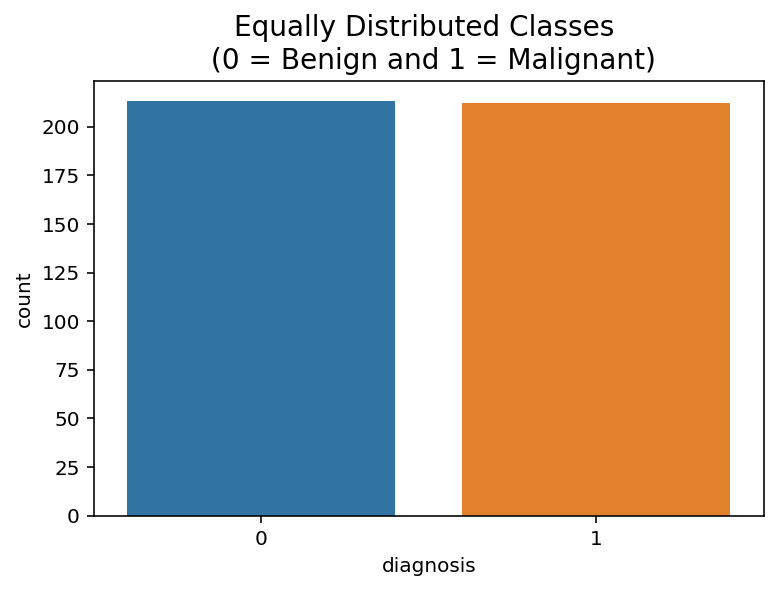

In [25]:
#Equally distributing and correlating
print('Distribution of the Classes in the subsample dataset')
print(new_df['diagnosis'].value_counts()/len(new_df))



sn.countplot('diagnosis', data=new_df)
plt.title('Equally Distributed Classes \n (0 = Benign and 1 = Malignant)', fontsize=14)
plt.show()

In [29]:
X = new_df.drop('diagnosis', axis=1)
y = new_df['diagnosis']

In [30]:
##dataset splitting
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [31]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [32]:
#Decision Tree
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
clf2=DecisionTreeClassifier()
clf2.fit(X_train,y_train)
dt_predict_train = clf2.predict(X_train)
dtrain_accuracy = metrics.accuracy_score(y_train, dt_predict_train)
print("Accuracy: {0:.4f}".format(dtrain_accuracy))
y_pred=clf2.predict(original_Xtest)

Accuracy: 1.0000


In [33]:
import sklearn.metrics as metrics
metrics.accuracy_score(original_ytest,y_pred)

0.9707602339181286

<AxesSubplot:>

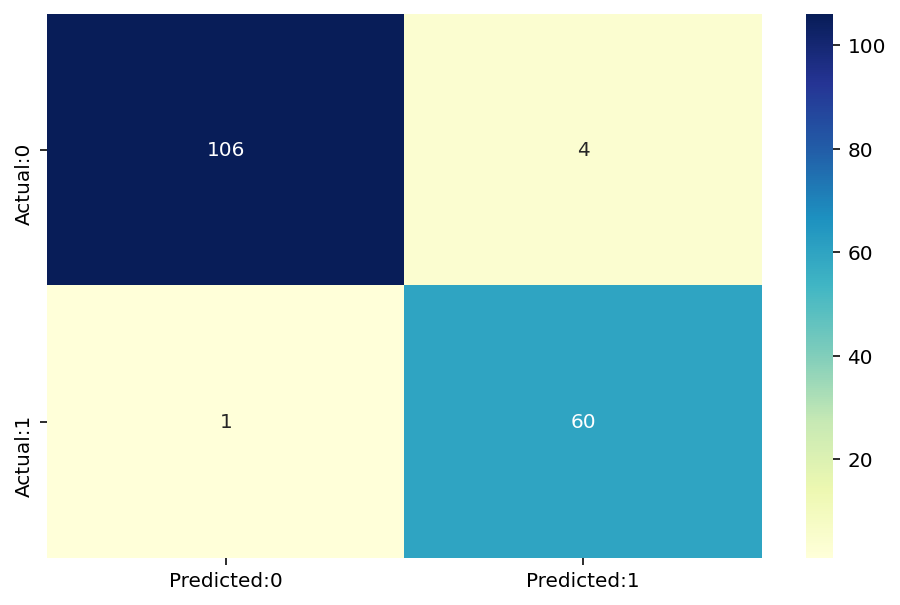

In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(original_ytest,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [35]:
#accuracy in test data
from sklearn.metrics import accuracy_score as score
print('Accuracy')
print(score(original_ytest,y_pred)*100)

Accuracy
97.07602339181285


In [36]:
##precision & recall
from sklearn.metrics import precision_score, recall_score
Precision = precision_score(original_ytest,y_pred)
Recall = recall_score(original_ytest,y_pred)
print('Recall = ',Recall)
print('Precision = ',Precision)
from sklearn.metrics import f1_score
f1 = f1_score(original_ytest,y_pred)
print('F1 = ',f1)
#AUC score
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(original_ytest,y_pred)
print('AUC = ', AUC)

Recall =  0.9836065573770492
Precision =  0.9375
F1 =  0.96
AUC =  0.9736214605067064


In [37]:
#svm
from sklearn import svm
clf3 = svm.SVC(probability=True)
clf3.fit(X_train,y_train)
svm_predict_train = clf3.predict(X_train)
svm_accuracy = metrics.accuracy_score(y_train, svm_predict_train)
print("Accuracy: {0:.4f}".format(svm_accuracy))
y_pred=clf3.predict(original_Xtest)

Accuracy: 0.9125


In [38]:
#accuracy in test data
from sklearn.metrics import accuracy_score as score
print('Accuracy')
print(score(original_ytest,y_pred)*100)

Accuracy
93.56725146198829


In [39]:
##precision & recall
from sklearn.metrics import precision_score, recall_score
Precision = precision_score(original_ytest,y_pred)
Recall = recall_score(original_ytest,y_pred)
print('Recall = ',Recall)
print('Precision = ',Precision)
from sklearn.metrics import f1_score
f1 = f1_score(original_ytest,y_pred)
print('F1 = ',f1)
#AUC score
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(original_ytest,y_pred)
print('AUC = ', AUC)

Recall =  0.9180327868852459
Precision =  0.9032258064516129
F1 =  0.9105691056910569
AUC =  0.9317436661698958


In [40]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
clf4 = KNeighborsClassifier(n_neighbors=4)
clf4.fit(X_train,y_train)
knn_predict_train = clf4.predict(X_train)
knn_accuracy = metrics.accuracy_score(y_train, knn_predict_train)
print("Accuracy: {0:.4f}".format(knn_accuracy))
y_pred=clf4.predict(original_Xtest)

Accuracy: 0.9293


In [41]:
#accuracy in test data
from sklearn.metrics import accuracy_score as score
print('Accuracy')
print(score(original_ytest,y_pred)*100)

Accuracy
95.32163742690058


In [42]:
##precision & recall
from sklearn.metrics import precision_score, recall_score
Precision = precision_score(original_ytest,y_pred)
Recall = recall_score(original_ytest,y_pred)
print('Recall = ',Recall)
print('Precision = ',Precision)
from sklearn.metrics import f1_score
f1 = f1_score(original_ytest,y_pred)
print('F1 = ',f1)
#AUC score
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(original_ytest,y_pred)
print('AUC = ', AUC)

Recall =  0.8852459016393442
Precision =  0.9818181818181818
F1 =  0.9310344827586207
AUC =  0.9380774962742177


In [43]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
clf6 = RandomForestClassifier(n_estimators=200, random_state=42)
clf6.fit(X_train, y_train.ravel())
rf_predict_train = clf6.predict(X_train)
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)
print("Accuracy: {0:.4f}".format(rf_accuracy))
y_pred=clf6.predict(original_Xtest)

Accuracy: 1.0000


In [44]:
#accuracy in test data
from sklearn.metrics import accuracy_score as score
print('Accuracy')
print(score(original_ytest,y_pred)*100)

Accuracy
98.24561403508771


In [45]:
##precision & recall
from sklearn.metrics import precision_score, recall_score
Precision = precision_score(original_ytest,y_pred)
Recall = recall_score(original_ytest,y_pred)
print('Recall = ',Recall)
print('Precision = ',Precision)
from sklearn.metrics import f1_score
f1 = f1_score(original_ytest,y_pred)
print('F1 = ',f1)
#AUC score
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(original_ytest,y_pred)
print('AUC = ', AUC)

Recall =  0.9836065573770492
Precision =  0.967741935483871
F1 =  0.975609756097561
AUC =  0.9827123695976155


In [46]:
#kmeans
from sklearn.cluster import KMeans
clf5 = KMeans(n_clusters=4, random_state=0)
clf5.fit(X_train,y_train)
y_pred=clf5.predict(original_Xtest)

In [47]:
#accuracy in test data
from sklearn.metrics import accuracy_score as score
print('Accuracy')
print(score(original_ytest,y_pred)*100)

Accuracy
61.40350877192983


In [48]:
from sklearn.ensemble import VotingClassifier

In [49]:
estimators=[]

estimators.append(('DTC', clf2))
estimators.append(('SVM', clf3))
estimators.append(('KNN', clf4))
estimators.append(('RF', clf6))



# create the ensemble model
voting_hard = VotingClassifier(estimators, voting='hard')
voting_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('DTC', DecisionTreeClassifier()),
                             ('SVM', SVC(probability=True)),
                             ('KNN', KNeighborsClassifier(n_neighbors=4)),
                             ('RF',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42))])

In [50]:
#training with Hard Voting in training data
import sklearn.metrics as metrics
hard_predict_train = voting_hard.predict(X_train)

#get accuracy
hard_accuracy = metrics.accuracy_score(y_train, hard_predict_train)

#print accuracy
print("Accuracy: {0:.4f}".format(hard_accuracy))

Accuracy: 0.9461


In [51]:
#training with hard in testing data
hard_predict_test = voting_hard.predict(original_Xtest)

#get accuracy
hard_accuracy_testdata = metrics.accuracy_score(original_ytest, hard_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(hard_accuracy_testdata))

Accuracy: 0.9649


In [52]:
##precision & recall for hard
from sklearn.metrics import precision_score, recall_score
Precision = precision_score(original_ytest,hard_predict_test)
Recall = recall_score(original_ytest,hard_predict_test)
print('Recall = ',Recall)
print('Precision = ',Precision)
from sklearn.metrics import f1_score
f1 = f1_score(original_ytest,hard_predict_test)
print('F1 = ',f1)
#AUC score
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(original_ytest,hard_predict_test)
print('AUC = ', AUC)

Recall =  0.9180327868852459
Precision =  0.9824561403508771
F1 =  0.9491525423728813
AUC =  0.9544709388971685


<AxesSubplot:>

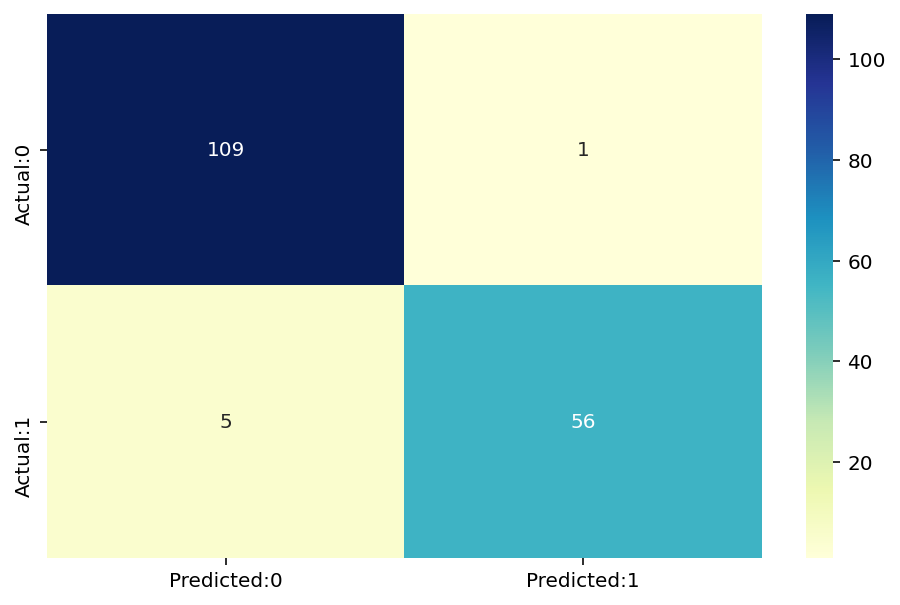

In [53]:
#confusion matrix for Hard
from sklearn.metrics import confusion_matrix
conf_hard=confusion_matrix(original_ytest,hard_predict_test)
conf_hard_matrix=pd.DataFrame(data=conf_hard,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_hard_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [54]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator
import six
class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        
    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
    
    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [57]:
# Majority Rule (hard) Voting
from sklearn.model_selection import cross_val_score
mv_clf = MajorityVoteClassifier(classifiers=[clf2, clf3, clf4, clf6])

clf_labels += ['Decision Tree', 'SVM', 'KNN', 'Random Forest', 'Hard Voting']
all_clf = [clf2, clf3, clf4, clf6, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
    

ROC AUC: 0.90 (+/- 0.04) [Decision Tree]
ROC AUC: 0.97 (+/- 0.03) [SVM]
ROC AUC: 0.95 (+/- 0.04) [KNN]
ROC AUC: 0.98 (+/- 0.02) [Random Forest]
ROC AUC: 0.98 (+/- 0.02) [Hard Voting]


Text(0.5, 1.0, 'ROC Curves for Breast Cancer Predicting Classifiers')

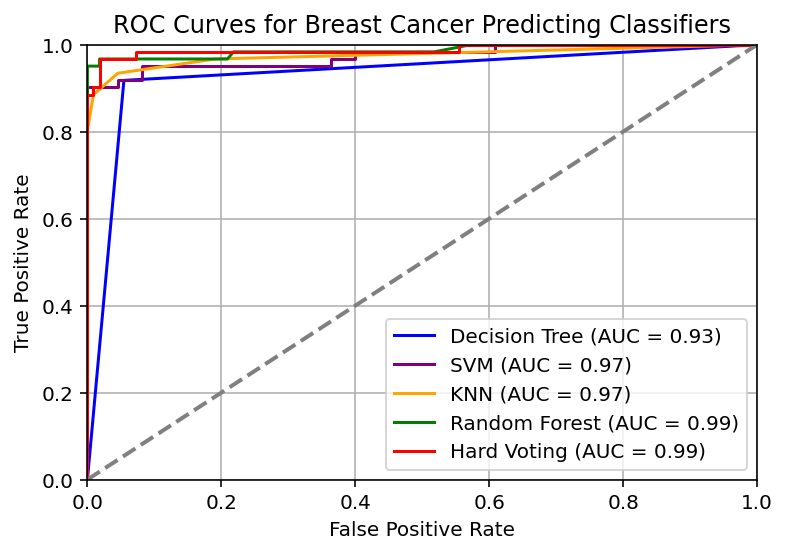

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

all_clf = [clf2, clf3, clf4, clf6, mv_clf]
clf_labels = ['Decision Tree', 'SVM', 'KNN', 'Random Forest', 'Hard Voting']
colors = ['blue', 'purple', 'orange', 'green', 'red']
linestyles = ['-', '-', '-', '-', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(original_Xtrain,
                     original_ytrain).predict_proba(original_Xtest)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=original_ytest,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (AUC = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Breast Cancer Predicting Classifiers')

In [59]:
from sklearn.model_selection import cross_val_score
classifiers = {
    "Decision Tree": clf2,
    "SVM": clf3,
    "KNN": clf4,
    "RF": clf6,
    "Hard Voting": mv_clf
}
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a validation score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  DecisionTreeClassifier Has a validation score of 91.0 % accuracy score
Classifiers:  SVC Has a validation score of 90.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a validation score of 89.0 % accuracy score
Classifiers:  RandomForestClassifier Has a validation score of 96.0 % accuracy score
Classifiers:  MajorityVoteClassifier Has a validation score of 91.0 % accuracy score


In [60]:
from sklearn.model_selection import cross_val_score
classifiers = {
    "Decision Tree": clf2,
    "SVM": clf3,
    "KNN": clf4,
    "RF": clf6,
    "Hard Voting": mv_clf
}
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=10)
    print("Classifiers: ", classifier.__class__.__name__, "Has a validation score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  DecisionTreeClassifier Has a validation score of 90.0 % accuracy score
Classifiers:  SVC Has a validation score of 90.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a validation score of 89.0 % accuracy score
Classifiers:  RandomForestClassifier Has a validation score of 95.0 % accuracy score
Classifiers:  MajorityVoteClassifier Has a validation score of 90.0 % accuracy score


In [62]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
mae = mean_absolute_error(original_ytest,hard_predict_test)
mse = mean_squared_error(original_ytest,hard_predict_test)
ll = log_loss(original_ytest,hard_predict_test)
print('MAE = ',mae)
print('MSE = ',mse)
print('Log Loss = ',ll)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(original_ytest, hard_predict_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
#from scikitplot.metrics import plot_roc_curve
#import scikitplot as skplt
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(original_ytest,hard_predict_test)
print('MCC = ',mcc)
from sklearn.metrics import average_precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import brier_score_loss
aps = average_precision_score(original_ytest,hard_predict_test)
print('APS = ',aps)
bas = balanced_accuracy_score(original_ytest,hard_predict_test, adjusted=False)
print('BAS = ',bas)
bsl = brier_score_loss(original_ytest,hard_predict_test)
print('BSL = ',bsl)

MAE =  0.03508771929824561
MSE =  0.03508771929824561
Log Loss =  1.2118915670578623
Average precision-recall score: 0.93
MCC =  0.9236501811984977
APS =  0.9311667146007093
BAS =  0.9544709388971684
BSL =  0.03508771929824561


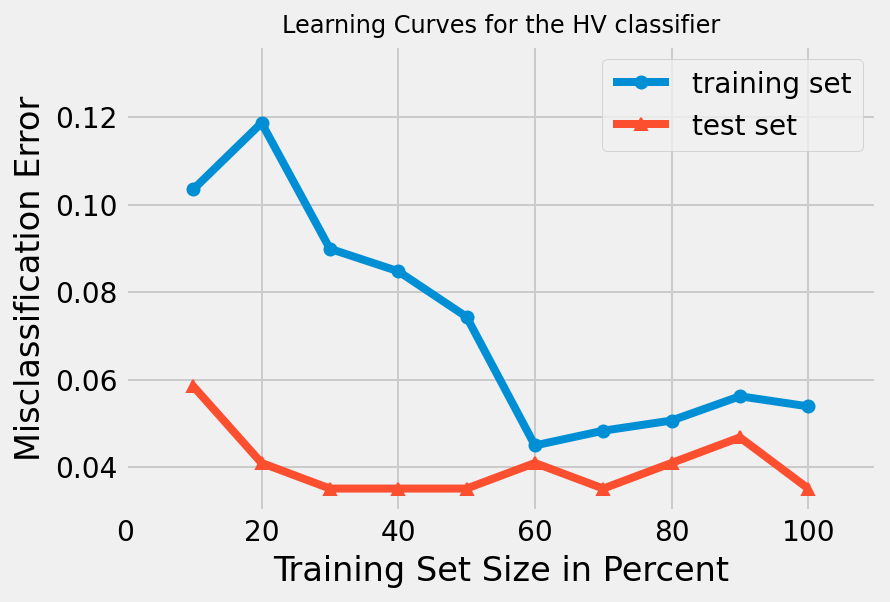

In [63]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.preprocessing import shuffle_arrays_unison
plot_learning_curves(X_train, y_train, original_Xtest, original_ytest, voting_hard)
plt.xlabel('Training Set Size in Percent')
plt.ylabel('Misclassification Error')
#plt.ylim([0.0, 1.05])
#plt.xlim([0.0, 1.0])
plt.title('Learning Curves for the HV classifier')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.93')

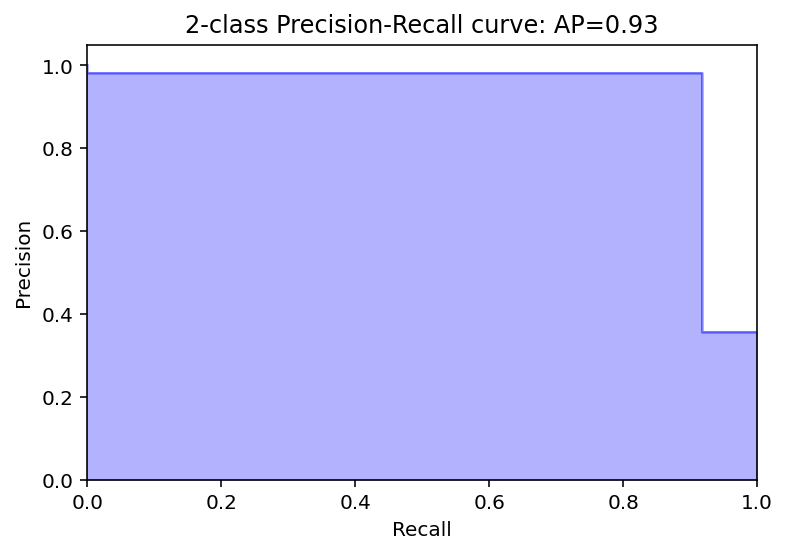

In [64]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(original_ytest, hard_predict_test)

plt.step(recall, precision, color='b', alpha=0.3,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))